In [9]:
from keras import applications
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

87916544/87910968 [==============================] - 24s 0us/step


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
total_time = []

In [57]:
Category = "Men's_Shirts"
incV3_feature_list = []
image_names=[]


start = time.time()

path = 'C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/' + Category
for img_path in os.listdir(path):
    if('.DS_Store' not in os.path.join(path,img_path)):
        image_names.append(img_path)
        img = image.load_img(os.path.join(path,img_path), target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        incV3_feature = model.predict(img_data)
        incV3_feature_np = np.array(incV3_feature)
        incV3_feature_list.append(incV3_feature_np.flatten())

incV3_feature_list_np = np.array(incV3_feature_list)
end = time.time()
print("Total Time", end - start)

Total Time 733.930989742279


In [58]:
total_time.append(end - start)

In [59]:
total_time

[99.72807574272156,
 772.3707611560822,
 1769.273072719574,
 1495.7983622550964,
 733.930989742279]

In [60]:
incV3_feature_list_np.shape

(1057, 2048)

In [61]:
incV3_feature_list_np

array([[0.28434265, 0.7026738 , 0.36185196, ..., 0.7575488 , 0.38098428,
        0.7181923 ],
       [0.34168643, 0.18988487, 0.32110137, ..., 0.13172795, 0.59145993,
        0.23357922],
       [0.02993989, 0.2891396 , 0.07651553, ..., 0.47408667, 0.99337053,
        0.6355341 ],
       ...,
       [1.0246975 , 0.08667262, 1.1411719 , ..., 0.        , 0.6777192 ,
        0.50258625],
       [1.1807425 , 0.28363672, 0.8071758 , ..., 0.26053917, 0.5862476 ,
        0.3657753 ],
       [1.7150344 , 0.20822941, 0.9899638 , ..., 0.03251309, 0.3052306 ,
        0.15206529]], dtype=float32)

In [62]:
import pickle

pickled_db_path = "features_incV3/Men's_Shirts.pck"

with open(pickled_db_path, 'wb') as fp:
        pickle.dump(incV3_feature_list_np, fp)
        print("dumped")
fp.close()

dumped


In [63]:
start = time.time()
with open(pickled_db_path, 'rb') as fp:
        #vgg_loaded = pickle.load(fp)
        incV3_loaded = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [64]:
incV3_loaded.shape

(1057, 2048)

In [27]:
# query_image_path = "C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/Chiffon/40632_shop_01.jpg"
query_image_path= "11046_shop_01.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
incV3_feature_query = model.predict(img_dataq)
incV3_feature_np_query = np.array(incV3_feature_query)
incV3_feature_np_query = incV3_feature_np_query.flatten()

In [28]:
incV3_feature_np_query.shape

(2048,)

In [29]:
from scipy.spatial import distance

similarity = []
count = 0

for i in incV3_loaded:
    count = count+1
    d = distance.cosine(i,incV3_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [30]:
similarity

[(0.5421451926231384, '11038_shop_01.jpg'),
 (0.5541540384292603, '11039_comsumer_04.jpg'),
 (0.5061410665512085, '11040_comsumer_05.jpg'),
 (0.48814961314201355, '11041_comsumer_01.jpg'),
 (0.5725613236427307, '11042_comsumer_02.jpg'),
 (0.498896986246109, '11043_comsumer_03.jpg'),
 (0.5385875105857849, '11044_comsumer_08.jpg'),
 (0.5346000790596008, '11045_comsumer_09.jpg'),
 (1.0, '11046_shop_01.jpg'),
 (0.6090720295906067, '11047_comsumer_07.jpg'),
 (0.5573288798332214, '11048_comsumer_13.jpg'),
 (0.6185172200202942, '11049_comsumer_12.jpg'),
 (0.5650599598884583, '11050_comsumer_06.jpg'),
 (0.6221144199371338, '11051_comsumer_10.jpg'),
 (0.6698777079582214, '11052_comsumer_04.jpg'),
 (0.6545299291610718, '11053_comsumer_05.jpg'),
 (0.634338915348053, '11054_comsumer_11.jpg'),
 (0.5582308769226074, '11055_comsumer_15.jpg'),
 (0.5216116905212402, '11056_comsumer_01.jpg'),
 (0.6204218864440918, '11057_comsumer_14.jpg'),
 (0.5564201474189758, '11058_comsumer_02.jpg'),
 (0.547565460205

In [31]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


C:\Users\SAI SUPRAJA M\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


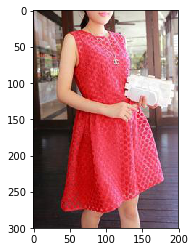

Result images ========================================
similarity 1.0


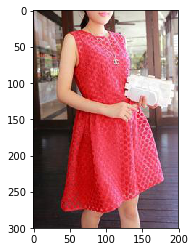

similarity 0.7357356548309326


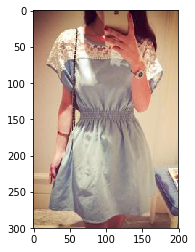

similarity 0.7020922303199768


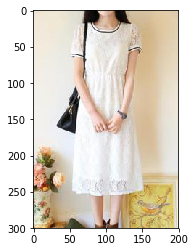

similarity 0.6917113065719604


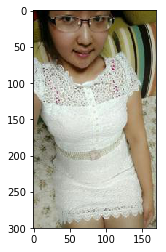

similarity 0.6887747645378113


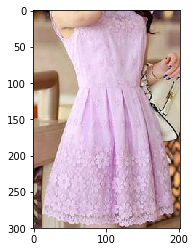

similarity 0.6804604530334473


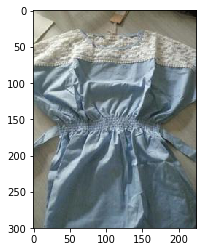

In [32]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]
Category = "Lace_Dress"
path = 'C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/' + Category

print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    show_img(path+ "/"+des_similarity[i][1])
    
end = time.time()

In [ ]:
total_time_main = end - start
print("total_time_main", total_time_main)

In [65]:
total_model_time = 0.0
for i in range(0, len(total_time)):
    total_model_time = total_model_time + total_time[i]

print("total_model_time", total_model_time)

total_model_time 4871.101261615753
